# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [2]:
df = pd.read_csv("data/comprar_alquilar.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [3]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [4]:
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [5]:
X = df.drop('comprar', axis=1)
y = df['comprar']

std = StandardScaler()
X_std = std.fit_transform(X)

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [6]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_std)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.321915,-0.222950,-1.599863,-0.885014,0.646617,-0.700208,-0.318031,0.751809,0.269984
1,-1.147878,1.716967,-0.395722,-0.447960,-0.687805,-0.231969,-1.542487,-0.221799,0.438425
2,-0.090369,1.836066,-1.359382,0.337505,0.742387,0.593030,1.540495,-0.668120,0.153463
3,-3.455898,-0.078279,0.202382,-1.573584,-0.068551,-0.051945,-0.909409,-0.684486,-0.129045
4,-0.916933,-1.184676,-0.190036,0.117804,-0.147753,-0.619750,0.450419,-0.194341,0.687452
...,...,...,...,...,...,...,...,...,...
197,0.707036,-2.506168,0.430903,0.583919,-0.620195,-0.205709,-0.728973,-0.244936,0.640035
198,2.038917,1.378909,0.824921,0.039240,0.373044,0.013360,-0.401364,-0.106836,-0.076905
199,1.481464,0.975900,-0.637578,0.884946,0.128337,-0.655749,-0.662248,-0.437755,-0.796369
200,1.514633,-0.392176,-0.005710,1.308566,-0.114526,-0.056951,-0.820040,-0.055710,-0.143768


### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------


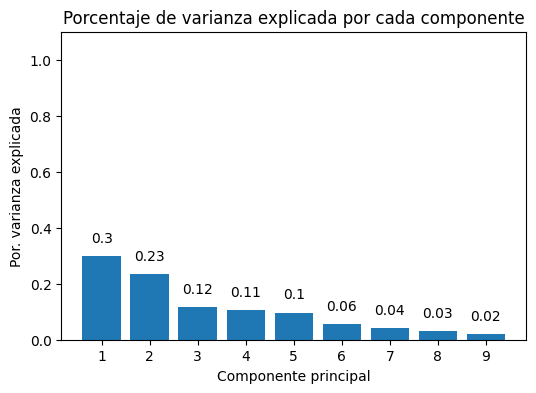

In [7]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
#### CODE ####

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X_pca.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [8]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')

pc_acum = pd.DataFrame({"Porcentaje": prop_varianza_acum}, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

pc_acum

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------


,Porcentaje
PC1,0.299136
PC2,0.532085
PC3,0.649197
PC4,0.756053
PC5,0.852406
PC6,0.908705
PC7,0.950161
PC8,0.980339
PC9,1.000000


In [9]:
# 5 componentes expliarían 85%

### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.29913557 0.5320848  0.64919721 0.75605343 0.85240621 0.90870487
 0.95016066 0.98033885 1.        ]


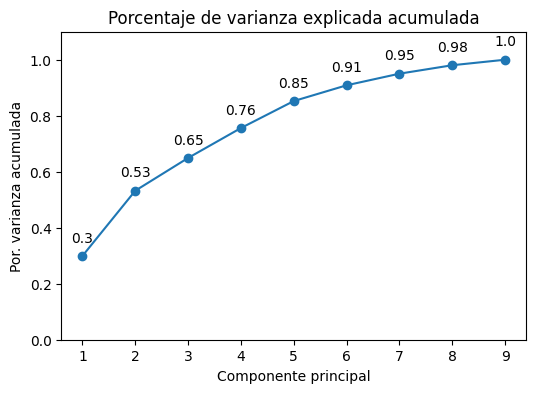

In [10]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X_pca.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_pca.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

<Axes: >

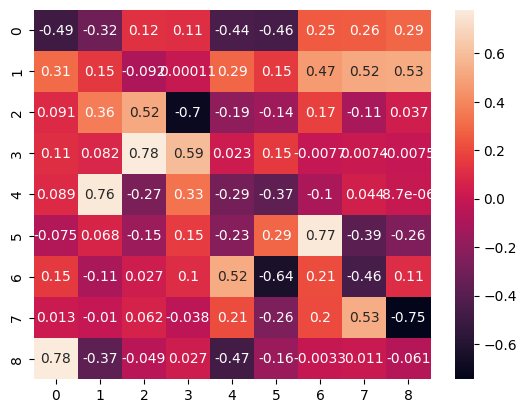

In [11]:
sns.heatmap(pca.components_, annot=True)

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - KNN con 3 vecinos
3. Entrena
4. Predice en test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?
8. Guarda tu modelo

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
from sklearn.pipeline import make_pipeline

In [14]:
X = df.drop('comprar',axis =1)
y = df['comprar']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
pipe_pca= make_pipeline(StandardScaler(), PCA(n_components=5), KNeighborsClassifier(n_neighbors=3))
pipe_pca.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [16]:
predict = pipe_pca.predict(X_test)
predict

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predict)

0.7560975609756098

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict)
print(cm)

[[21  3]
 [ 7 10]]


In [23]:
from sklearn.model_selection import GridSearchCV

parameters = {'pca__n_components':[1,2,3,4,5,6,7,8,9], 'kneighborsclassifier__n_neighbors':[1,2,3,4,5,6,7,8,9]}

gs = GridSearchCV(pipe_pca, parameters, cv=5)

gs.fit(X_train, y_train)

gs.best_params_

{'kneighborsclassifier__n_neighbors': 7, 'pca__n_components': 9}

In [24]:
final_model = gs.best_estimator_

In [25]:
predict = final_model.predict(X_test)
accuracy_score(y_test,predict)

0.8292682926829268

Guarda el modelo

In [28]:
import pickle

with open("models/modelo_final_pca_knn.pkl", 'wb') as archivo:
    pickle.dump(final_model, archivo)